# A3: Visualization for Exploratory Data Analysis

* [Part 1: EDA](#Part-1.-EDA)
* [Part 2: Data Analysis](#Part-2:-Data-analysis-with-Matplotlib)
* [Submission](#Submission)
* [Lab environment](#Lab-environment-for-the-assignment)

## Objective

The main focus of [our course](https://courses.cs.sfu.ca/2020sp-cmpt-733-g1) is on data analytics. In fact, however, there are many other exciting topics about Big Data, which we cannot cover due to time constraints. [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf) gave you a brief overview of Visualization. Assignment 3 is designed to deepen your understanding. After completing this assignment, you should be able to answer the following questions:

1. How to perform visual data analysis using Python?
2. How to study the behaviour of a machine learning algorithm using visualization?

As a motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

## Part 1. EDA

**Real estate data**

Imagine you are data scientist working at a real-estate company. In this week, you job is to analyze the Vancouver's housing price. You first download a dataset from [property_tax_report_2019.zip](property_tax_report_2019.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2019.  You can find the schema information of the dataset from this [webpage](http://data.vancouver.ca/datacatalogue/propertyTaxAttributes.htm). But this is not enough. You still know little about the data. That's why you need to do EDA in order to get a better and deeper understanding of the data.

We first load the data as a DataFrame. To make this analysis more interesting, I added two new columns to the data: `CURRENT_PRICE` represents the property price in 2019; `PREVIOUS_PRICE` represents the property price in 2018. 

In [1]:
import pandas as pd

# before running this, unzip the provided data
df = pd.read_csv("data/property_tax_report_2019.csv")

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

Now let's start the EDA process. 

**Hint.** For some of the following questions, we provided an example plot (see [link](https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A3/A3-plots.html)). But note that you do not have to use the same plot design. In fact, we didn't do a good job to follow the *Principles of Visualization Design* in the second half of the slides of [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf), please review this part by yourself.
You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [2]:
# --- Write your code below ---
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
0,010-543-490,LAND,638035310000,63803531,RS-1,One Family Dwelling,17,C,VAP7743,538,...,40900.0,2020.0,3663000.0,36100.0,1948.0,1958.0,NaN,1,3157900.0,3699100.0
1,010-868-810,LAND,643019250000,64301925,RS-1,One Family Dwelling,3,7,VAP6583,140,...,5943000.0,2020.0,7373000.0,6278000.0,2013.0,2015.0,NaN,1,11950000.0,13651000.0
2,007-944-055,LAND,23637870000,2363787,RS-1,One Family Dwelling,7,137,VAP6064,540,...,1417000.0,2020.0,4108000.0,1421000.0,2010.0,2011.0,NaN,1,4817000.0,5529000.0
3,007-284-250,LAND,24630040000,2463004,RS-1,One Family Dwelling,E,130,VAP17355,540,...,186000.0,2020.0,4813000.0,189000.0,1980.0,1980.0,NaN,1,4177000.0,5002000.0
4,005-264-642,STRATA,24637320005,2463732,CD-1 (123),Comprehensive Development,5,NaN,VAS506,540,...,222000.0,2020.0,3281000.0,241000.0,1978.0,1978.0,NaN,1,2892000.0,3522000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.

In [3]:
# --- Write your code below ---
df.describe()

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,CURRENT_PRICE,PREVIOUS_PRICE
count,2.131730e+05,2.131730e+05,212614.000000,2.116890e+05,2.116890e+05,211689.0,2.094580e+05,2.094580e+05,207947.000000,207947.000000,0.0,213173.000000,2.116890e+05,2.094580e+05
mean,4.990187e+11,4.990187e+07,2367.091217,1.650511e+06,4.173165e+05,2020.0,1.861022e+06,3.985750e+05,1983.303712,1990.890366,NaN,16.509023,2.067827e+06,2.259597e+06
std,2.484478e+11,2.484478e+07,1974.417146,9.498832e+06,4.355459e+06,0.0,1.062555e+07,4.073771e+06,29.639154,19.504433,NaN,8.975789,1.182037e+07,1.265086e+07
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2020.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,NaN,1.000000,1.000000e+00,0.000000e+00
25%,2.107441e+11,2.107441e+07,939.000000,4.590000e+05,9.710000e+04,2020.0,5.040000e+05,9.570000e+04,1972.000000,1979.000000,NaN,9.000000,6.403000e+05,6.900000e+05
50%,6.122714e+11,6.122714e+07,1775.000000,9.230000e+05,1.860000e+05,2020.0,1.045000e+06,1.840000e+05,1993.000000,1994.000000,NaN,16.000000,1.119000e+06,1.253000e+06
75%,6.891993e+11,6.891993e+07,3319.000000,1.400000e+06,3.040000e+05,2020.0,1.611000e+06,2.980000e+05,2005.000000,2005.000000,NaN,25.000000,1.698200e+06,1.898000e+06
max,8.453134e+11,8.453134e+07,9295.000000,2.759584e+09,6.934260e+08,2020.0,3.165054e+09,6.228440e+08,2019.000000,2019.000000,NaN,30.000000,2.767385e+09,3.172855e+09


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [4]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
df_missing = df[df["YEAR_BUILT"].isna()]
percentage = round((len(df_missing)/len(df))*100,2)
print("Missing Value: ",percentage,"%")

Missing Value:  2.45 %


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1990 to 2018)?" Please plot a line chart to answer the question.

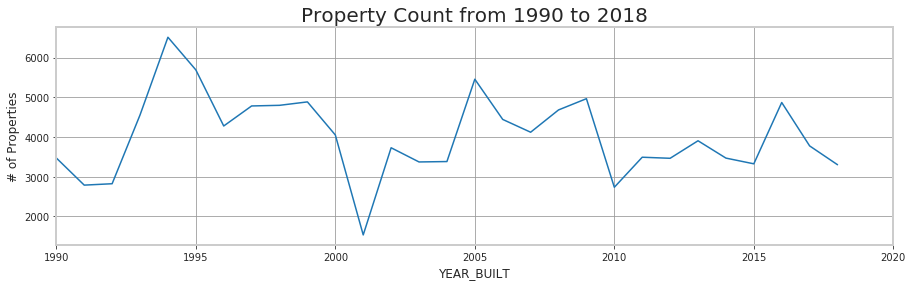

In [5]:
# --- Write your code below ---
import seaborn as sns
import matplotlib.pyplot as plt
df_filter = df[(df["YEAR_BUILT"]>=1990) & (df["YEAR_BUILT"]<=2018)]
df_filter = df_filter.groupby("YEAR_BUILT").size().reset_index(name='# of Properties')
df_filter = df_filter.astype(int)

sns.set_style("whitegrid",{'xtick.bottom': True,'ytick.left': True,'grid.color': '.6'})
fig,ax = plt.subplots(figsize=(15,4))
figr = sns.lineplot(x='YEAR_BUILT', y='# of Properties', data=df_filter)
figr.axes.set_title("Property Count from 1990 to 2018",fontsize=20)
figr.axes.set_xlabel("YEAR_BUILT",fontsize=12)
figr.axes.set_ylabel("# of Properties",fontsize=12)
ax.set(xlim=(1990, 2020))
plt.setp(ax.spines.values(), linewidth=2)
plt.show();

Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. 1994 was the year that witnessed maximum number of properties being built. Similary we can note that 2001 had minimum number of properties built.
2. We can also note that the property count steep spikes at the interval of 11 years. We can see spikes in the year 1994,2005 and 2016

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2018, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

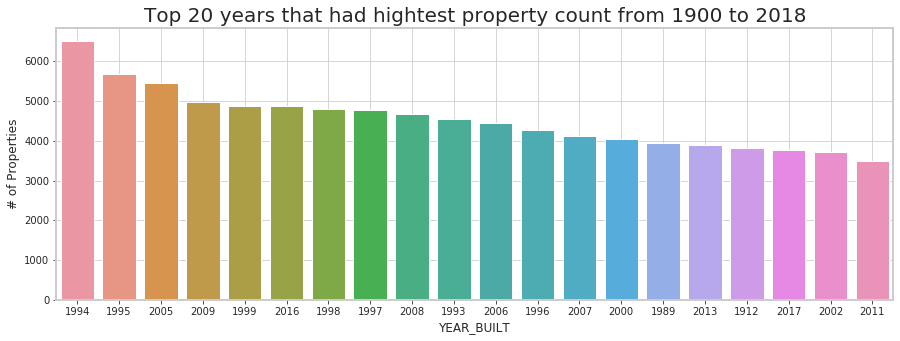

In [7]:
# --- Write your code below ---
import seaborn as sns
import matplotlib.pyplot as plt

df_filter1 = df[(df["YEAR_BUILT"]>=1900) & (df["YEAR_BUILT"]<=2018)]
df_filter1 = df_filter1.groupby("YEAR_BUILT").size().reset_index(name='# of Properties')
df_filter1 = df_filter1.astype(int)
df_top20 = df_filter1.nlargest(20, '# of Properties')

sns.set_style("whitegrid",{'xtick.bottom': True,'ytick.left': True})
fig,ax = plt.subplots(figsize=(15,5))
figr = sns.barplot(x='YEAR_BUILT', y='# of Properties', data=df_top20,order=df_top20['YEAR_BUILT'])
figr.axes.set_title("Top 20 years that had hightest property count from 1900 to 2018",fontsize=20)
figr.axes.set_xlabel("YEAR_BUILT",fontsize=12)
figr.axes.set_ylabel("# of Properties",fontsize=12)
ax.yaxis.grid(True)
ax.xaxis.grid(True) 
plt.setp(ax.spines.values(), linewidth=2)
plt.show();

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. It can be noted from the above graph that 1994 was the year that had maximum number of properties with a count above 6000.
2. The number of properties recorded for all consecutive years in the period of 1993 to 2000 has made it to top 20. 

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1990 and 2018? Please plot a histogram to answer this question.

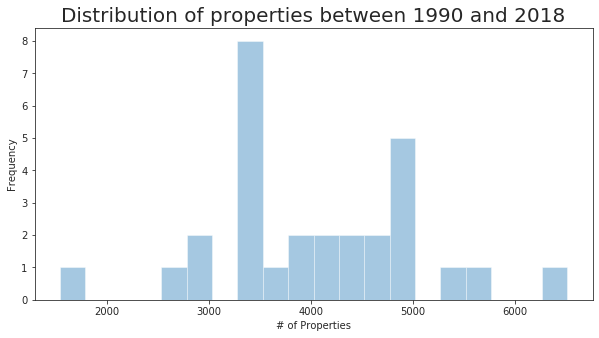

In [11]:
# --- Write your code below ---
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white",{'xtick.bottom': True,'ytick.left': True})
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(df_filter["# of Properties"],bins=20,kde=False, rug=False)
ax.set_title("Distribution of properties between 1990 and 2018",fontsize=20)
ax.set(ylabel='Frequency')
ax.set(xlabel='# of Properties')
plt.show();

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Eight years recorded a property count of 3250 to 3500 which was the maximum from 1990 to 2018.
2. We can note that above plot follows a normal distribution with its median in the range of 3250 to 4500

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

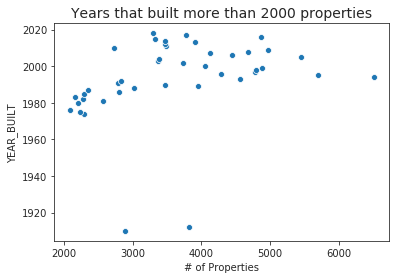

In [12]:
# --- Write your code below ---
import seaborn as sns
import matplotlib.pyplot as plt

df_group = df.groupby("YEAR_BUILT").size().reset_index(name='# of Properties')
df_group = df_group.astype(int)
df2000 = df_group[df_group["# of Properties"] > 2000]

sns.set_style("white",{'xtick.bottom': True,'ytick.left': True})

figr = sns.scatterplot(x='# of Properties', y='YEAR_BUILT', data=df2000);
figr.axes.set_title("Years that built more than 2000 properties",fontsize=14)
figr.axes.set_ylabel("YEAR_BUILT",fontsize=10)
figr.axes.set_xlabel("# of Properties",fontsize=10)
plt.show();

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. It can be noted that until 1970 there are only two occurances in which the number of properties crossed 2000.
2. Period from 1980 to 2020 witnessed a gradual increase of properties being constructed with majority of years crossing 2000 mark.

## Part 2: Data and Model Visualization

Revisit [Assignment 9 from CMPT 732 - Weather prediction](https://coursys.sfu.ca/2018fa-cmpt-732-g1/pages/Assign9#h-predicting-the-weather-how-hard-can-it) and show a deeper analysis of the same temperature data utilizing a simplified version of the model you already have.

**Data**

The weather data on HDFS `/courses/732/tmax-{1,2,3,4}` spans a large time period and covers many stations around the globe. There are many possible questions to study. Use a python plotting library of your choice, such as matplotlib.

**Model**

The model from A9 of CMPT 732 was using `'latitude', 'longitude', 'elevation', 'yesterday_tmax', 'day_of_year'` as input features to predict `t_max`. Please retrain your model to only use `'latitude', 'longitude', 'elevation', 'day_of_year'` before proceeding with task (b) below, and include this re-trained `weather-model` in your submission.

**Tasks**

**a)** Produce **one or more figures** that illustrate the **daily max. temperature distribution over the entire globe** and enable **a comparison of different, non-overlapping time periods**, e.g. to reveal temporal trends over longer time periods or recurring seasons.

Only show temperatures where you have data available. Take care to handle overplotting of multiple different values into the same point on the figure, which might happen when you have multiple measurements for the same station in a chosen period. By *handle* overplotting we mean, for instance, to aggregate your data to have a clear meaning for the value that is displayed for a particular station, such as max. or average within the period.

Here is an example from the web:
<img src="http://c3headlines.typepad.com/.a/6a010536b58035970c013486e5c5e6970c-pi"/>

**b)** Produce two or more figures that show the result of your re-trained regression model from CMPT 732-A9, i.e. a version of the model that does not use `yesterday_tmax` as extra input feature:

**(b1)** Evaluate your model at a grid of latitude, longitude positions around the globe spanning across oceans and continents, leading to a dense plot of temperatures. This could, for instance, look something like the following:
<img src="http://www.physicalgeography.net/fundamentals/images/jan_temp.gif"/>
You can use a fixed `day_of_year` of your choice. Also, see further hints about `elevation` below.

**(b2)** In a separate plot show the regression error of your model predictions against test data. In this case only use locations where data is given, i.e. you may reuse your plotting method from Part 2 (a).

**Comments and Hints**

Any imperfections of your trained model that show up in the visualization are fine. In fact, in this example it is a sign of a good visualization, if it enables us to understand shortcomings of the model. You are not marked for the performance of your model from 732-A9 again, but rather for the methods you create here to investigate it. 

Please attempt to make continent or country borders visible on your map. You can do that either by using library function or by using enough data points, such that the shape of some continents roughly emerges from the data distribution. Out of the different datasets please use one with at least 100k rows.

For (b1) you will need elevation information for the points you produce. Have a look at [`elevation_grid.py`](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A3/elevation_grid.py) for a possible way to add this info to your choice of coordinates. If you place the accompanying [elevation data](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A3/elevations_latlon.npy.gz) in the same folder as the script you can import the module and see `help(evaluation_grid)` for example usage.
![](img/elevations.png)
`elevation_grid.py` internally stores elevation data as an array at 5 times the resolution of the figure shown here, use the `get_elevations` function to access it.

**Submission of Part 2** 

Please prepare the following components (each has one or two files):

1. *Report:* Combine the plots into a PDF document `weather_report.pdf` along with brief captions explaining and discussing the figures. If you decide to produce the PDF using a Jupyter notebook that contains the markdown to render and discuss the figures saved by `weather_plot.py` you can submit it as `weather_report.ipynb`. Submitting the notebook is optional.
2. *Code:* Please provide your code to produce the figures in a script `weather_plot.py`, which could be based on the [`weather_test.py`](https://coursys.sfu.ca/2018fa-cmpt-732-g1/pages/Assign9_Hint) from 732-A9. Since you may want to separate the spark code to run on the cluster from the plotting code, you can provide that in an optional script called `weather_spark.py`.
Please ensure that all visualization code relevant for marking is in these python scripts.
3. Submit the weather model that you are using.



## Submission

In summary, you need to complete the first part by filling out the first half of this notebook and the second part by following the submission instructions above. Overall, please submit <font color="blue">A3.ipynb</font>, <font color="blue">weather_plot.py</font>, <font color="blue">weather_spark.py</font>, <font color="blue">weather_report.{pdf|ipynb}</font>, and <font color="blue">weather-model</font> to the CourSys activity [Assignment 3](https://courses.cs.sfu.ca/2020sp-cmpt-733-g1/+a3/).

### Lab environment for the assignment

**Scratch space**

Your scratch space allows you to store larger files outside of your home folder, not counting them towards your limited disk quota. To make that space available via a link from your home folder use:
```
ln -s /usr/shared/CMPT/scratch/<username> ~/scratch
```
Similar to HDFS on gateway, please treat this space as a shared resource, i.e. remove large temporary files when you're done working with them.

**Conda**

For the big data lab setup, we have put a few useful python modules, such as `basemap` or `geoviews`, into a shared conda environment. To use the environment call
```
source activate /usr/shared/CMPT/big-data/condaenv/py36
```
or prepare once with
```
mkdir -p ~/.conda/envs
ln -s /usr/shared/CMPT/big-data/condaenv/py36 ~/.conda/envs/
```
and from thereon simply activate using `source activate py36` and, for instance, work with `pyspark` on your local lab machine.

**Pip**

As alternative to conda you can also just use pip.

For instance, create a pip environment called `myenv` in the scratch space (see above)
```
python -m venv ~/scratch/myenv
```
Activate: `source ~/scratch/myenv/bin/activate`
